In [1]:
import numpy as np
import jax
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 14})

# Put module in import path
from pathlib import Path
import sys
project_top_level = Path.cwd().parents[0]
module_path = project_top_level.joinpath("lep_2e_2mu")
sys.path.insert(1, str(module_path))
# Needed for time being as processes will import from model
sys.path.append(str(module_path.joinpath("model")))

from processes.all_processes import Matrix_1_epem_mupmum
from model.parameters import ModelParameters
from phase_space_generator.flat_phase_space_generator import FlatInvertiblePhasespace
from phase_space_generator.flat_phase_space_generator import LorentzVectorList
from phase_space_generator.flat_phase_space_generator import LorentzVector

In [2]:
active_model = ModelParameters(None)


def matrix_element(x):
    e = 90.0
    theta = x

    process = Matrix_1_epem_mupmum()

    vectors = [
        [e / 2, 0, 0, e / 2],
        [e / 2, 0, 0, -e / 2],
        [e / 2, 0, e / 2 * jax.numpy.sin(theta), e / 2 * jax.numpy.cos(theta)],
        [e / 2, 0, -e / 2 * jax.numpy.sin(theta), -e / 2 * jax.numpy.cos(theta)],
    ]

    PS_point = LorentzVectorList(LorentzVector(v) for v in vectors)
    return process.smatrix(PS_point, active_model)[0]


matrix_element_prime = jax.grad(matrix_element)

In [3]:
angles = np.linspace(0, np.pi)

In [4]:
me_vals = np.asarray([matrix_element(angle) for angle in angles])

In [5]:
me_prime = np.asarray([matrix_element_prime(angle) for angle in angles])

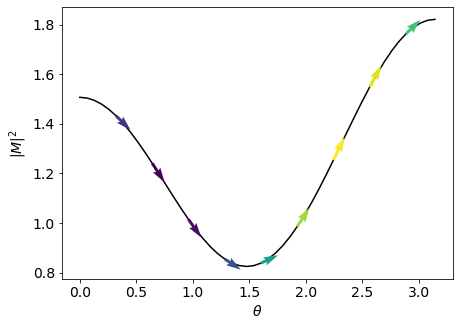

In [6]:
every_n = 5

fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

ax.plot(angles, me_vals, color="black")
ax.quiver(
    angles[::every_n],
    me_vals[::every_n],
    np.ones_like(angles)[::every_n],
    me_prime[::every_n],
    me_prime[::every_n],
    units="xy",
    angles="xy",
    zorder=99,
)
ax.set_xlabel(r"$\theta$")
ax.set_ylabel(r"$|M|^{2}$");